In [12]:
#2f

In [1]:
import cv2 as c
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as mplot
import os as o

In [2]:
# Define the paths to the class directories (replace with your actual paths)
class1_dir = r'V:\poo asgn\Images\n02115641-dingo'
class2_dir = r'V:\poo asgn\Images\n02093256-Staffordshire_bullterrier'

In [3]:
# Function to load and process images from a directory
def load_and_process_imgs(directory):
    imgs = []
    for filename in o.listdir(directory):
        if filename.endswith(".jpg"):
            # Loading the image in grayscale
            img = c.imread(o.path.join(directory, filename), c.IMREAD_GRAYSCALE)
            if img is not None:
                # Convert the image to a pixel intensity histogram
                histogram = c.calcHist([img], [0], None, [256], [0, 256]).flatten()
                imgs.append(histogram)
    return imgs

In [4]:
# Loading and processing images from both classes
class1_imgs = load_and_process_imgs(class1_dir)
class2_imgs = load_and_process_imgs(class2_dir)

In [5]:
# Combining the two classes of images into one dataset
img_dataset = class1_imgs + class2_imgs

In [6]:
# Converting the list of histograms to a NumPy array
histograms_array = np.array(img_dataset)

In [7]:
# Normalize the dataset
scaler = StandardScaler()
normalized_histograms = scaler.fit_transform(histograms_array)

In [8]:
# Perform PCA dimensionality reduction to 2 dimensions
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(normalized_histograms)

In [9]:
# Separate the reduced features into two classes
class1_features = reduced_features[:len(class1_imgs)]
class2_features = reduced_features[len(class1_imgs):]

Text(0.5, 1.0, 'PCA Dimensionality Reduction')

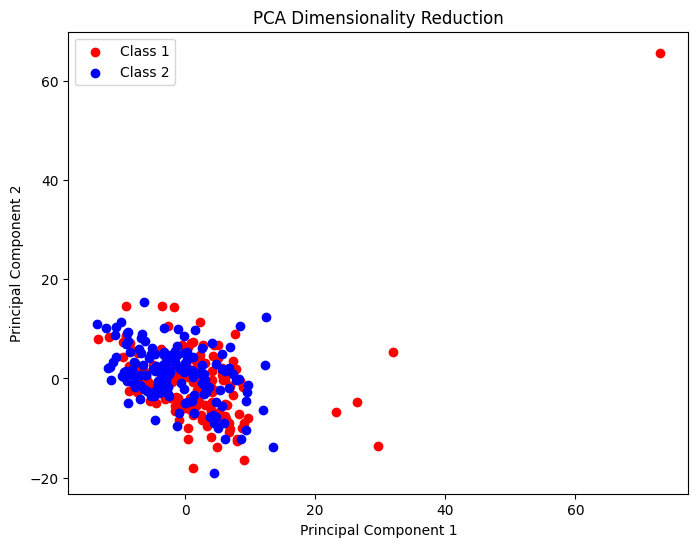

In [10]:
# Ploting the 2D points with two different colors for data from the two classes
mplot.figure(figsize=(8, 6))
mplot.scatter(class1_features[:, 0], class1_features[:, 1], label='Class 1', c='red')
mplot.scatter(class2_features[:, 0], class2_features[:, 1], label='Class 2', c='blue')
mplot.xlabel('Principal Component 1')
mplot.ylabel('Principal Component 2')
mplot.legend()
mplot.title('PCA Dimensionality Reduction')

In [11]:
# Showing the plot
mplot.show()